In [4]:
import pandas as pd
import numpy as np
from snownlp import SnowNLP
import time
import datetime
import json
from PIL import Image
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim import corpora, models
import csv
from sklearn.feature_extraction.text import  CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.feature_extraction.text import  TfidfVectorizer
import matplotlib.pyplot as plt
import re
import jieba

In [5]:
data0 = pd.read_csv("北京高校_1_3.csv")
data = pd.read_csv("北京高校.csv")
df0 = pd.DataFrame()
df = pd.DataFrame()

df0['date'] = pd.to_datetime(data0['发布时间'].apply(lambda x:x[0:10]),format='%Y-%m-%d')
df0['content'] = data0['微博正文']
df['date'] = pd.to_datetime(data['发布时间'].apply(lambda x:x[0:10]),format='%Y-%m-%d')
df['content'] = data['微博正文']
df = pd.concat([df0,df],ignore_index=True,join='inner')
df.sort_values(by=['date'],inplace=True)
df.drop_duplicates(inplace=True)
df

date                                            content
0    2022-01-01  2022新年快乐@北京高校联队@捷酷JAKROO@vortex轮组@潘震-自行车教练@战五渣...
575  2022-01-01  #北大跨年灯光秀#【2022｜#北京大学跨年晚会#】新年的钟声已经敲响，崭新的篇章已然翻开。...
826  2022-01-01  新的一年不要爱情不要金钱什么我都不要了求求让我在北京高校录取名单上吧我愿意每个初一都去雍和宫...
827  2022-01-01   #北京大学跨年晚会#在战火纷飞的年代，有一位特殊的民族脊梁，他以锣鼓为矛、粉墨为盾，与敌人...
828  2022-01-01                                          元旦@北京高校联队
...         ...                                                ...
4191 2022-06-01  #小兴播报#【快来报名！“未来城市”启航人全球创新挑战赛正式启动】日前，北京大兴国际机场临空...
4190 2022-06-01   #抗疫北京高校在行动#儿童节快乐和人大志愿者们一起，#过一个有意义的六一#！来源：@中国人民大学
4189 2022-06-01  【#高考加油#，快来查收北大学长学姐们的祝福！】寒窗十载，披星戴月，#高考倒计时6天#，少年...
4187 2022-06-01  1952年，高校院糸调整，浦江清从清华大学调入北京大学。57年暑中，校方按排他去北戴河疗养，...
3899 2022-06-01  20220531，上午核酸检测北京高校疫情防控推进会学校疫情防控会，修改专硕学硕开题报告。下...

[11067 rows x 2 columns]

In [6]:
stopwordlist = []
with open(r"stopwords.txt",'r',encoding="UTF-8") as f:
    for i in f:
        stopwordlist.append(i.strip())
#print(stopwordlist)
def sent2word(line):
    segList = jieba.cut(line,cut_all=False)
    segSentence = ''
    for word in segList:
        if word in stopwordlist:
            continue
        if word != '\t' and len(word)>1:
            segSentence += word + " "
    return segSentence.strip()
df['words'] = df['content'].apply(sent2word)
df.dropna(axis=0,how='any',inplace=True)
df.to_csv('datav2_weibo.csv')
df

date                                            content  \
0    2022-01-01  2022新年快乐@北京高校联队@捷酷JAKROO@vortex轮组@潘震-自行车教练@战五渣...   
575  2022-01-01  #北大跨年灯光秀#【2022｜#北京大学跨年晚会#】新年的钟声已经敲响，崭新的篇章已然翻开。...   
826  2022-01-01  新的一年不要爱情不要金钱什么我都不要了求求让我在北京高校录取名单上吧我愿意每个初一都去雍和宫...   
827  2022-01-01   #北京大学跨年晚会#在战火纷飞的年代，有一位特殊的民族脊梁，他以锣鼓为矛、粉墨为盾，与敌人...   
828  2022-01-01                                          元旦@北京高校联队   
...         ...                                                ...   
4191 2022-06-01  #小兴播报#【快来报名！“未来城市”启航人全球创新挑战赛正式启动】日前，北京大兴国际机场临空...   
4190 2022-06-01   #抗疫北京高校在行动#儿童节快乐和人大志愿者们一起，#过一个有意义的六一#！来源：@中国人民大学   
4189 2022-06-01  【#高考加油#，快来查收北大学长学姐们的祝福！】寒窗十载，披星戴月，#高考倒计时6天#，少年...   
4187 2022-06-01  1952年，高校院糸调整，浦江清从清华大学调入北京大学。57年暑中，校方按排他去北戴河疗养，...   
3899 2022-06-01  20220531，上午核酸检测北京高校疫情防控推进会学校疫情防控会，修改专硕学硕开题报告。下...   

                                                  words  
0     新年快乐 联队 捷酷 JAKROO vortex 轮组 潘震 自行车 教练 战五渣 罗雪 t...  
575   北大 跨年 灯光 北京大学 跨年 晚会 新年 钟声 敲响 崭新 篇章 已然 翻开 回顾 北京...  
826                       一年 爱情 金钱 求求 录取名单 初一 雍和宫 烧香 油钱  
827   北京大学 跨年 晚会 战火纷飞 年代 一位 民族 脊梁 锣鼓 粉墨 为盾 敌人 誓死 抗争 ...  
828                                               元旦 联队  
...                                                 ...  
4191  小兴 播报 报名 未来 城市 启航 全球 创新 挑战赛 正式 启动 日前 大兴 国际 机场 ...  
4190                   抗疫 儿童节 快乐 人大 志愿者 意义 六一 来源 中国人民大学  
4189  高考 加油 查收 学姐 祝福 寒窗 十载 披星戴月 高考 倒计时 少年 以笔 奔赴 战场 听...  
4187  1952 调整 浦江 清华大学 调入 北京大学 57 年暑 校方 按排 北戴河 疗养 胃部 ...  
3899  20220531 上午 核酸 检测 疫情 防控 推进 疫情 防控 修改 专硕学硕 开题 报告...  

[11067 rows x 3 columns]

In [7]:
dict = {}
words = df['words'].apply(lambda x:jieba.cut(x,cut_all=False))
for line in words:
    for word in line:
        if word in dict.keys():
            dict[word]=dict[word]+1
        else:
            dict[word]=1

w_order=sorted(dict.items(),key=lambda x:x[1],reverse=True)    

w_order10=w_order[:10]#将列表的前十位提取并且遍历 输出key(单词)和values(次数)
for key,values in w_order10:
    print(key,':',values)     

  : 401427
开学 : 3210
疫情 : 2436
毕业生 : 2415
视频 : 2102
冬奥 : 1892
冬奥会 : 1871
工作 : 1863
中国 : 1819
就业 : 1764


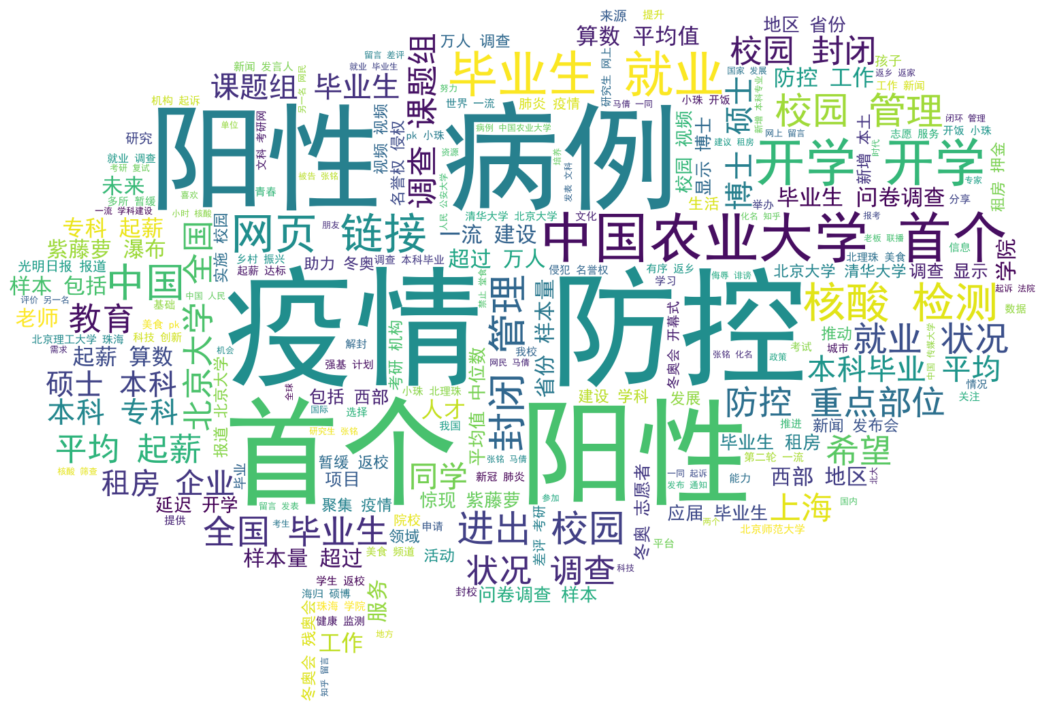

<Figure size 432x288 with 0 Axes>

In [8]:
words = list(df['words'])
text = ' '.join(words)
test_mask = np.array(Image.open('./mask.jpg'))
stopwords = set(STOPWORDS)
stopwords.add("said")

#cloud_words
wc = WordCloud(background_color="white", max_words=200, mask=test_mask,font_path='simhei.ttf',
        stopwords=stopwords)
# generate word cloud
wc.generate(text)
 
# plot and show
plt.figure(figsize=(19.6,12.8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()
 
# store to file
wc.to_file("test_weibo.png")

In [9]:
# 该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(max_features=20000)
# 该类会统计每个词语的tf-idf权值
tf_idf_transformer = TfidfTransformer()
# 将文本转为词频矩阵并计算tf-idf
tfidf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(df['words']))
# 获取词袋模型中的所有词语
tfidf_matrix = tfidf.toarray()
# 获取词袋模型中的所有词语
word = vectorizer.get_feature_names()
#print(word)

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
from sklearn.cluster import KMeans
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)

clusters = km.labels_.tolist()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
print(vectorizer.get_stop_words())
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

None
Cluster 0: 开学 疫情 解封 返校 视频 毕业生 专业 中国 新增 考研
Cluster 1: 开学 延迟 返校 刘浩存 北京市教委 求求 支持 快点 啥时候 延期
Cluster 2: 冬奥 冬奥会 志愿者 相亲会 未来 视频 助力 冰雪 服务 硕博
Cluster 3: 管理 校园 进出 封闭 实施 开学 疫情 谢谢 回家 师生员工
Cluster 4: 调查 毕业生 起薪 2021 5825 就业 平均 10113 本科毕业 状况
Cluster 5: 惊现 紫藤萝 瀑布 北大 贵校 名字 词条 标题 不配 姓名
Cluster 6: 重点部位 防控 疫情 回家 谢谢 堂食 到位 重点 外卖 开学
Cluster 7: 小珠 美食 开饭 北理珠 珠海 pk 频道 北京理工大学 学院 搭配
Cluster 8: 阳性 首个 病例 中国农业大学 cau 助力 农大 职工 核酸 中国农大
Cluster 9: 复试 文考 张铭 考研 研究生 名誉权 起诉 法院 原告 马倩


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
df.dropna(inplace = True)
df['words'].to_csv('ouput_weibo.csv',index=False,header=0)

In [12]:
PATH = "ouput_weibo.csv"
num_topics = 5
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
#print(data_set)
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes = 10,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
#print(result_list)
for topic in lda.print_topics(num_topics=num_topics):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')
df['result'] = result_list[:-1]
df

[(0, '0.044*"毕业生" + 0.031*"就业" + 0.016*"专业" + 0.015*"招聘" + 0.012*"2021" + 0.011*"全国" + 0.010*"新增" + 0.009*"高考" + 0.009*"学科" + 0.008*"调查"'), (1, '0.009*"中国" + 0.006*"发展" + 0.006*"专业" + 0.006*"建设" + 0.005*"教育" + 0.005*"创新" + 0.005*"全国" + 0.005*"考研" + 0.005*"国家" + 0.004*"科技"'), (2, '0.027*"疫情" + 0.017*"防控" + 0.017*"管理" + 0.014*"工作" + 0.013*"校园" + 0.012*"病例" + 0.012*"学生" + 0.011*"阳性" + 0.010*"中国农业大学" + 0.010*"首个"'), (3, '0.030*"开学" + 0.011*"冬奥" + 0.011*"冬奥会" + 0.009*"校园" + 0.009*"视频" + 0.008*"志愿者" + 0.007*"堂食" + 0.006*"回家" + 0.006*"青春" + 0.006*"毕业"'), (4, '0.014*"租房" + 0.013*"中学" + 0.009*"视频" + 0.008*"辩论" + 0.007*"北京市" + 0.006*"企业" + 0.006*"学院" + 0.005*"研究生" + 0.005*"美食" + 0.005*"直播"')]
0:
  "毕业生" (0.044)
  "就业" ( 0.031)
  "专业" ( 0.016)
  "招聘" ( 0.015)
  "2021" ( 0.012)
  "全国" ( 0.011)
  "新增" ( 0.010)
  "高考" ( 0.009)
  "学科" ( 0.009)
  "调查"( 0.008)
1:
  "中国" (0.009)
  "发展" ( 0.006)
  "专业" ( 0.006)
  "建设" ( 0.006)
  "教育" ( 0.005)
  "创新" ( 0.005)
  "全国" ( 0.005)
  "考研" ( 0.005)
  "国家" ( 0.005

date                                            content  \
0    2022-01-01  2022新年快乐@北京高校联队@捷酷JAKROO@vortex轮组@潘震-自行车教练@战五渣...   
575  2022-01-01  #北大跨年灯光秀#【2022｜#北京大学跨年晚会#】新年的钟声已经敲响，崭新的篇章已然翻开。...   
826  2022-01-01  新的一年不要爱情不要金钱什么我都不要了求求让我在北京高校录取名单上吧我愿意每个初一都去雍和宫...   
827  2022-01-01   #北京大学跨年晚会#在战火纷飞的年代，有一位特殊的民族脊梁，他以锣鼓为矛、粉墨为盾，与敌人...   
828  2022-01-01                                          元旦@北京高校联队   
...         ...                                                ...   
4191 2022-06-01  #小兴播报#【快来报名！“未来城市”启航人全球创新挑战赛正式启动】日前，北京大兴国际机场临空...   
4190 2022-06-01   #抗疫北京高校在行动#儿童节快乐和人大志愿者们一起，#过一个有意义的六一#！来源：@中国人民大学   
4189 2022-06-01  【#高考加油#，快来查收北大学长学姐们的祝福！】寒窗十载，披星戴月，#高考倒计时6天#，少年...   
4187 2022-06-01  1952年，高校院糸调整，浦江清从清华大学调入北京大学。57年暑中，校方按排他去北戴河疗养，...   
3899 2022-06-01  20220531，上午核酸检测北京高校疫情防控推进会学校疫情防控会，修改专硕学硕开题报告。下...   

                                                  words  result  
0     新年快乐 联队 捷酷 JAKROO vortex 轮组 潘震 自行车 教练 战五渣 罗雪 t...       4  
575   北大 跨年 灯光 北京大学 跨年 晚会 新年 钟声 敲响 崭新 篇章 已然 翻开 回顾 北京...       3  
826                       一年 爱情 金钱 求求 录取名单 初一 雍和宫 烧香 油钱       0  
827   北京大学 跨年 晚会 战火纷飞 年代 一位 民族 脊梁 锣鼓 粉墨 为盾 敌人 誓死 抗争 ...       1  
828                                               元旦 联队       3  
...                                                 ...     ...  
4191  小兴 播报 报名 未来 城市 启航 全球 创新 挑战赛 正式 启动 日前 大兴 国际 机场 ...       1  
4190                   抗疫 儿童节 快乐 人大 志愿者 意义 六一 来源 中国人民大学       3  
4189  高考 加油 查收 学姐 祝福 寒窗 十载 披星戴月 高考 倒计时 少年 以笔 奔赴 战场 听...       3  
4187  1952 调整 浦江 清华大学 调入 北京大学 57 年暑 校方 按排 北戴河 疗养 胃部 ...       3  
3899  20220531 上午 核酸 检测 疫情 防控 推进 疫情 防控 修改 专硕学硕 开题 报告...       2  

[11067 rows x 4 columns]

In [13]:
from pyLDAvis import gensim
import pyLDAvis
pyLDAvis.enable_notebook()

'''
lda: 计算好的话题模型

corpus: 文档词频矩阵

dictionary: 词语空间
'''
d = gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(d)
pyLDAvis.save_html(d, 'lda_weibo.html')

c:\Program Files\Python39\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


In [14]:
df.to_csv("weibo_data.csv")